In [1]:
import torch
import torch.nn as nn

# 입력 채널 1개, 출력 채널 8개, 필터 크기 3x3, 패딩 1
conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, padding=0)

# 입력 텐서: 배치 크기 4, 채널 수 3, 높이 28, 너비 28
x = torch.randn(4, 3, 28, 28)

# 합성곱 수행
y = conv(x)

# 출력 텐서의 형태 출력
print(y.shape)  # 결과: torch.Size([4, 3, 26, 26])


torch.Size([4, 3, 26, 26])


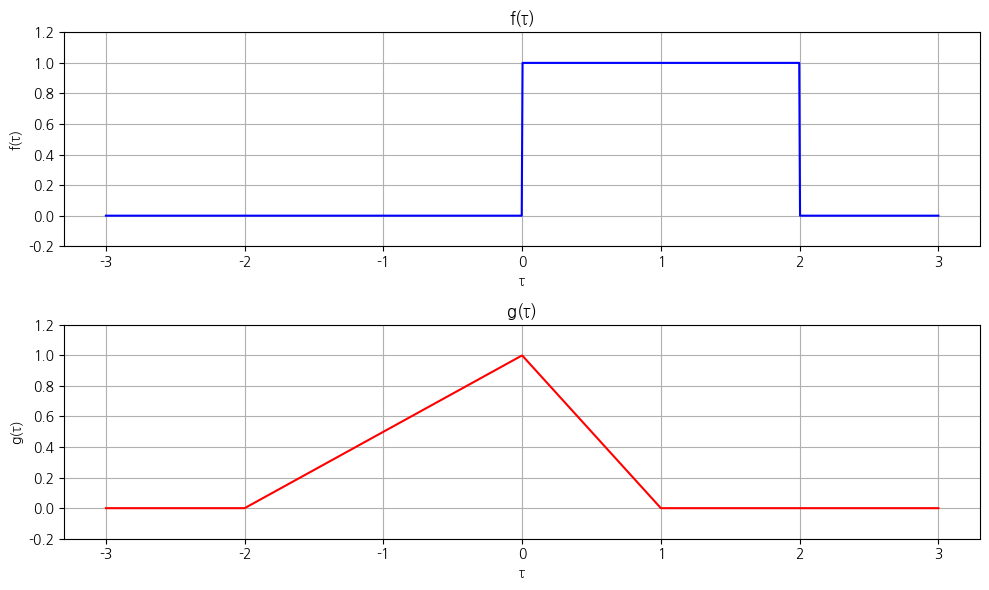

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# f(τ) 정의
def f(tau):
    return np.where((tau >= 0) & (tau <= 2), 1.0, 0.0)

# g(τ) 정의
def g(tau):
    return np.where((tau >= -2) & (tau <= 0), (tau+2)/2,
           np.where((tau > 0) & (tau <= 1), 1 - tau, 0.0))

# τ 범위
tau = np.linspace(-3, 3, 1000)

# 그래프
plt.figure(figsize=(10,6))

# f(τ)
plt.subplot(2,1,1)
plt.plot(tau, f(tau), color="blue")
plt.title("f(τ)")
plt.xlabel("τ")
plt.ylabel("f(τ)")
plt.grid(True)
plt.ylim(-0.2, 1.2)

# g(τ)
plt.subplot(2,1,2)
plt.plot(tau, g(tau), color="red")
plt.title("g(τ)")
plt.xlabel("τ")
plt.ylabel("g(τ)")
plt.grid(True)
plt.ylim(-0.2, 1.2)

plt.tight_layout()
plt.show()


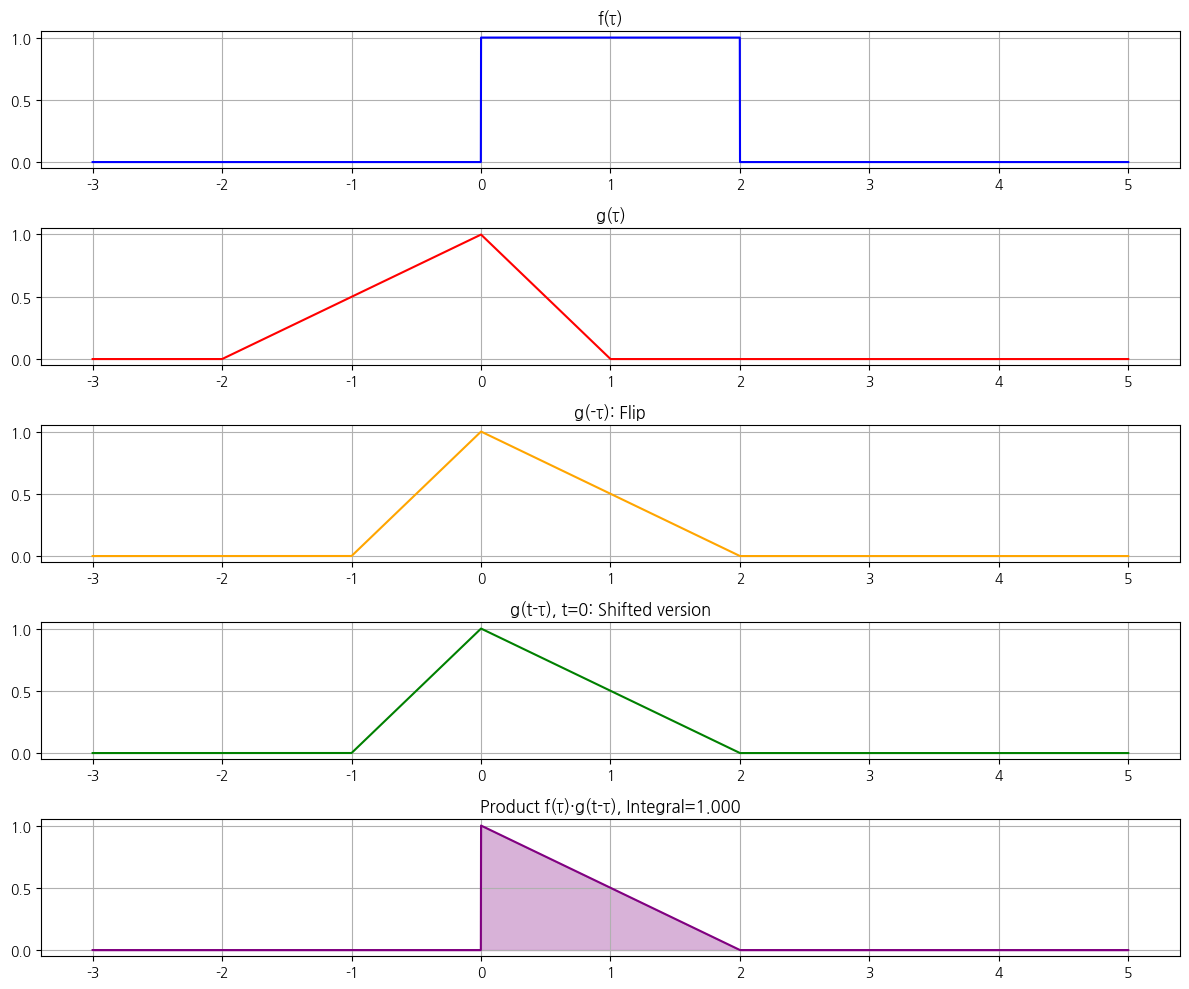

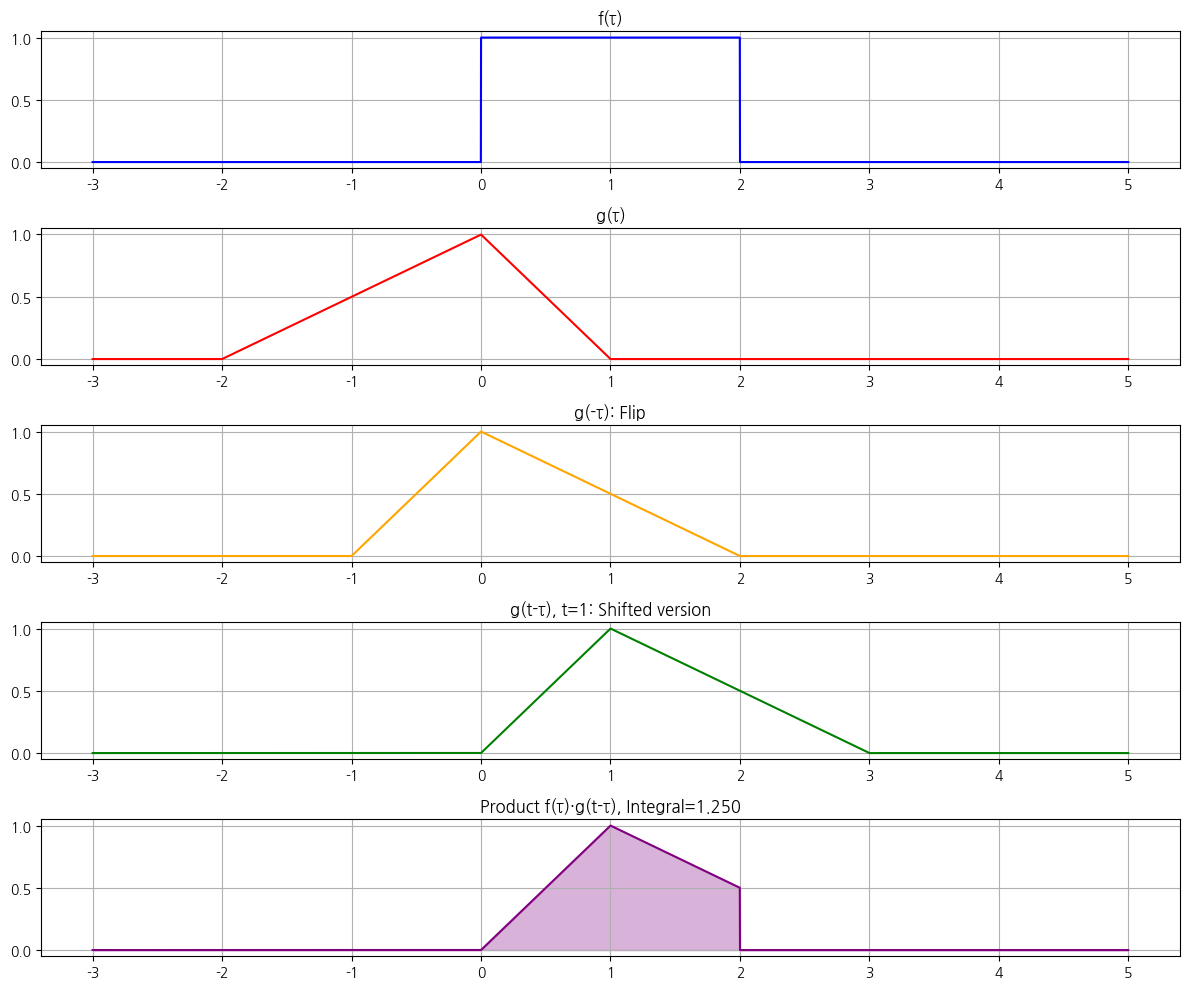

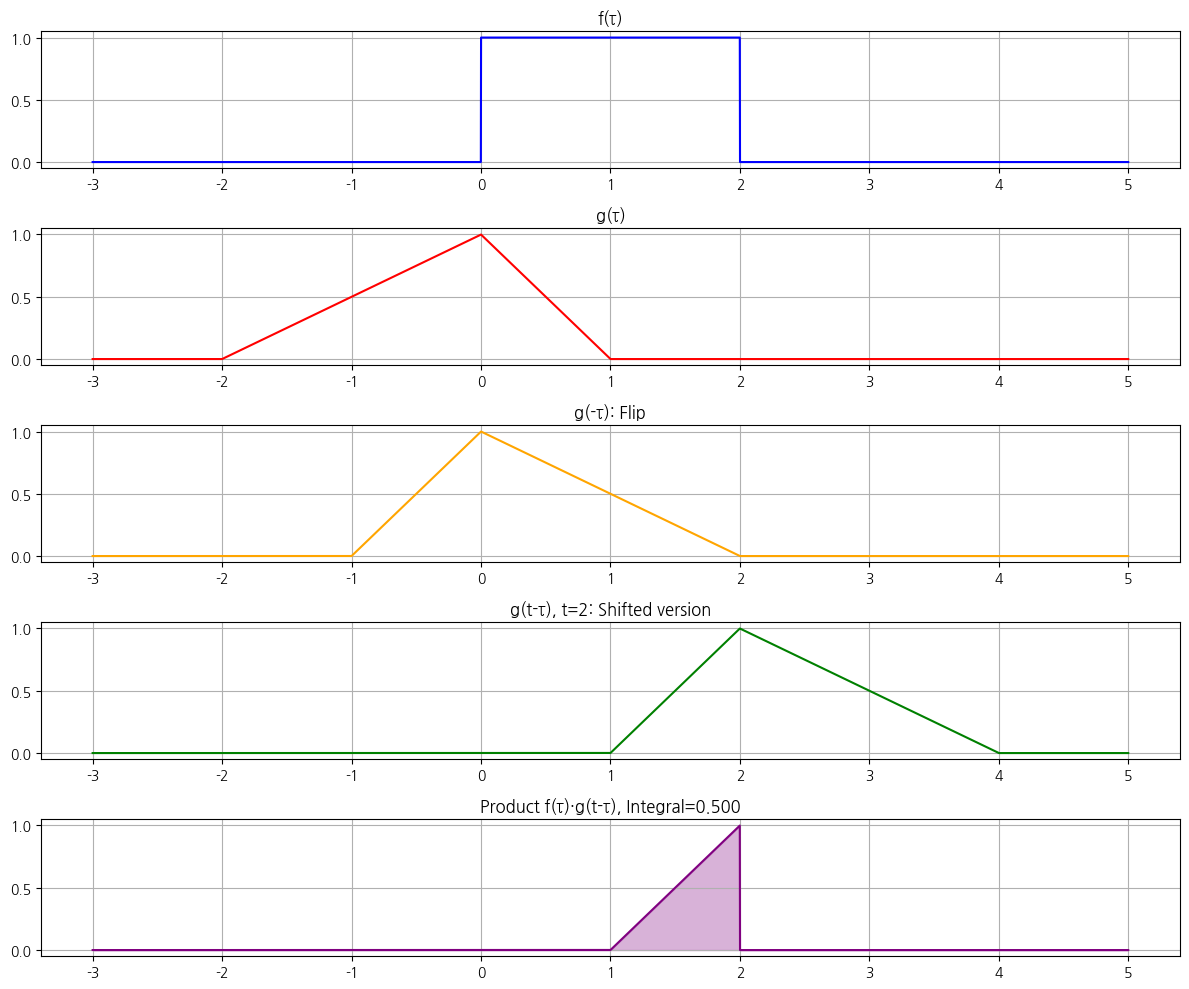

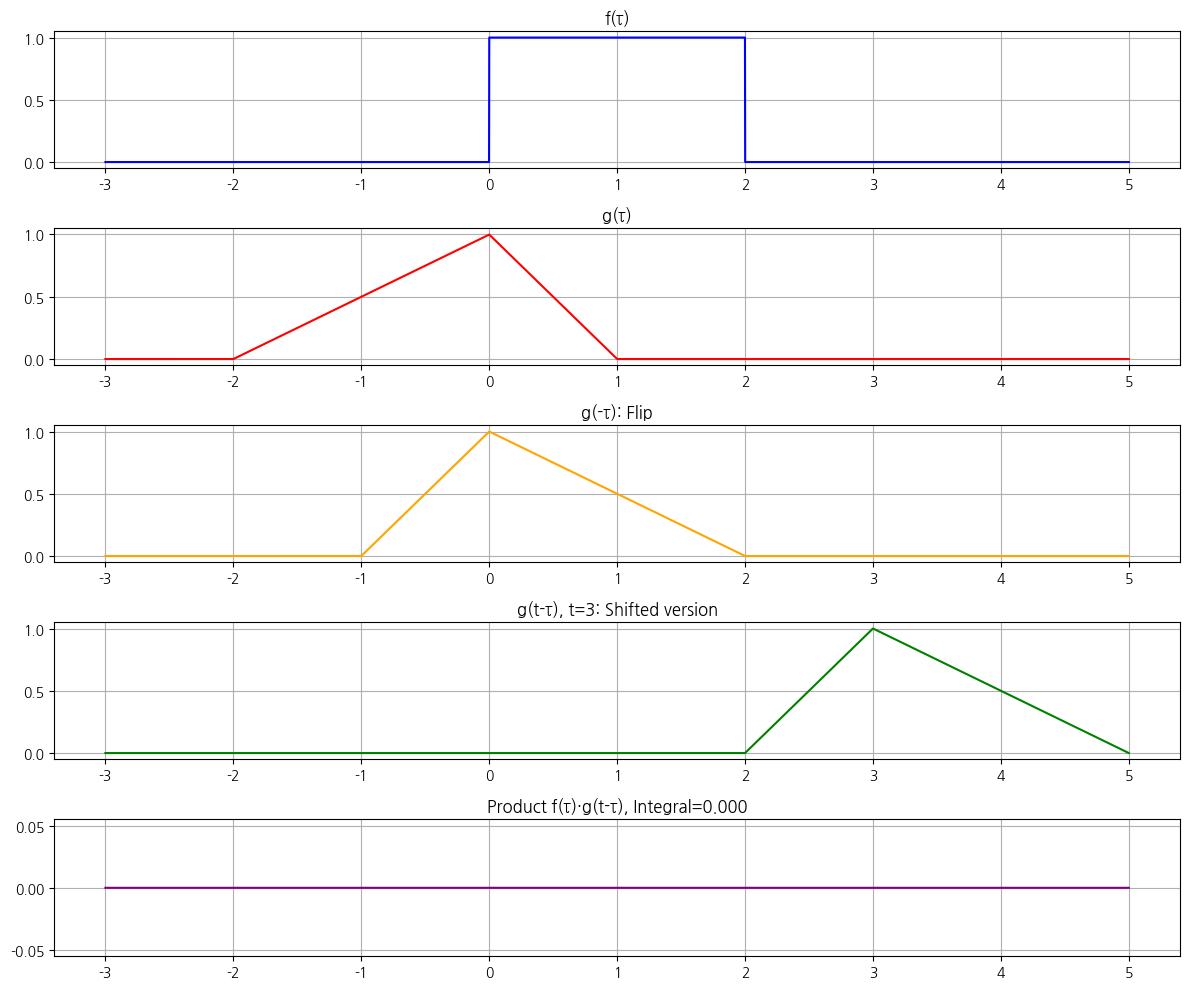

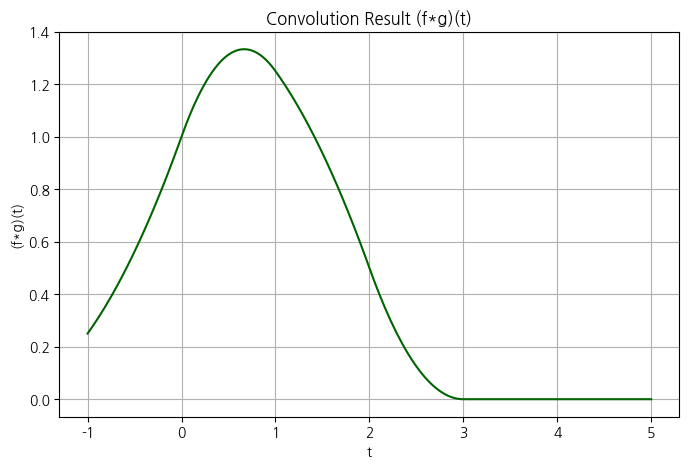

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# f(τ) 정의
def f(tau):
    return np.where((tau >= 0) & (tau <= 2), 1.0, 0.0)

# g(τ) 정의
def g(tau):
    return np.where((tau >= -2) & (tau <= 0), (tau+2)/2,
           np.where((tau > 0) & (tau <= 1), 1 - tau, 0.0))

# 컨볼루션 적분 (수치적 계산)
def conv_at_t(t):
    tau = np.linspace(-3, 5, 5000)
    integrand = f(tau) * g(t - tau)
    return np.trapz(integrand, tau), tau, integrand

# 여러 t값에서 단계별 시각화
t_values = [0, 1, 2, 3]
for t in t_values:
    value, tau, integrand = conv_at_t(t)
    plt.figure(figsize=(12,10))

    # 1. f(τ)
    plt.subplot(5,1,1)
    plt.plot(tau, f(tau), color="blue")
    plt.title("f(τ)")
    plt.grid(True)

    # 2. g(τ)
    plt.subplot(5,1,2)
    plt.plot(tau, g(tau), color="red")
    plt.title("g(τ)")
    plt.grid(True)

    # 3. g(-τ)
    plt.subplot(5,1,3)
    plt.plot(tau, g(-tau), color="orange")
    plt.title("g(-τ): Flip")
    plt.grid(True)

    # 4. g(t-τ)
    plt.subplot(5,1,4)
    plt.plot(tau, g(t - tau), color="green")
    plt.title(f"g(t-τ), t={t}: Shifted version")
    plt.grid(True)

    # 5. f(τ) * g(t-τ) + 적분값
    plt.subplot(5,1,5)
    plt.plot(tau, integrand, color="purple")
    plt.fill_between(tau, 0, integrand, color="purple", alpha=0.3)
    plt.title(f"Product f(τ)·g(t-τ), Integral={(value):.3f}")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# 전체 컨볼루션 함수 (f*g)(t)
t_range = np.linspace(-1, 5, 200)
conv_values = [conv_at_t(t)[0] for t in t_range]

plt.figure(figsize=(8,5))
plt.plot(t_range, conv_values, color="darkgreen")
plt.title("Convolution Result (f*g)(t)")
plt.xlabel("t")
plt.ylabel("(f*g)(t)")
plt.grid(True)
plt.show()


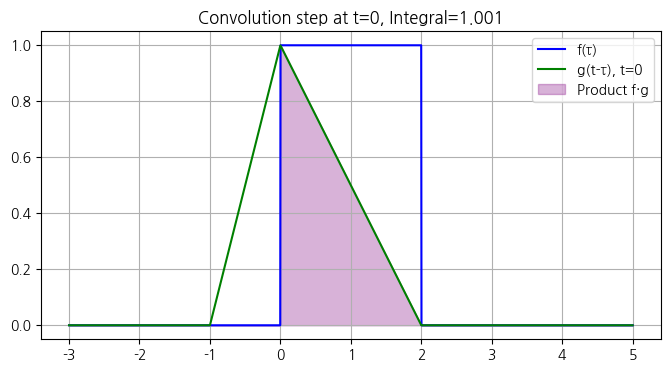

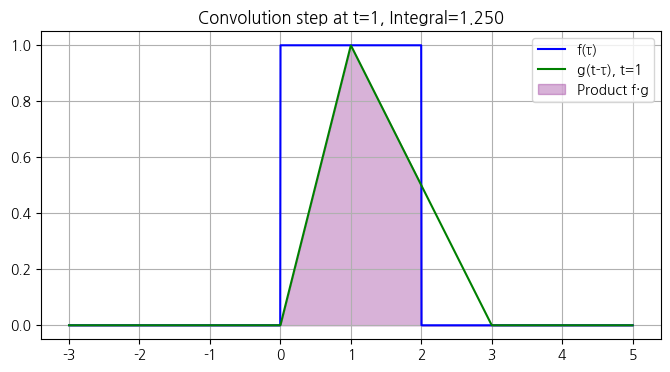

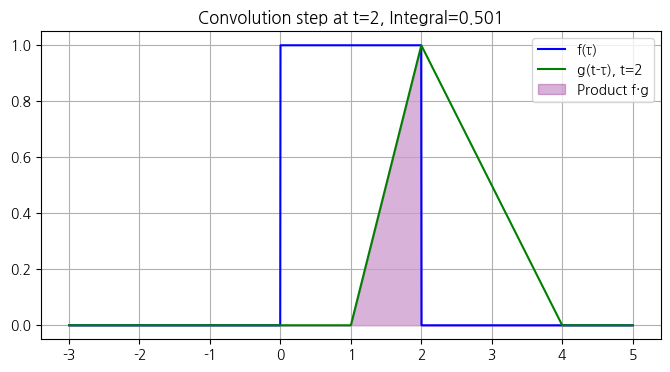

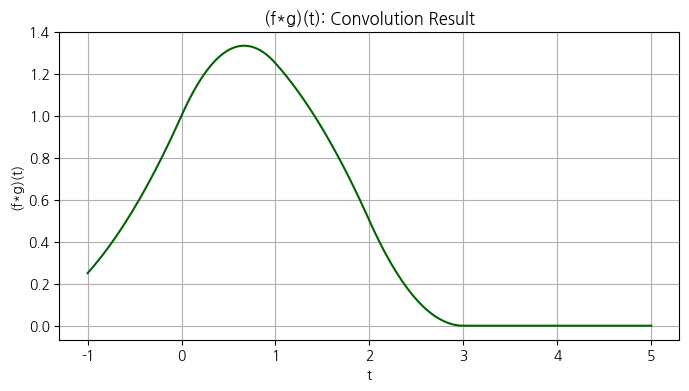

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# f(τ) 정의
def f(tau):
    return np.where((tau >= 0) & (tau <= 2), 1.0, 0.0)

# g(τ) 정의
def g(tau):
    return np.where((tau >= -2) & (tau <= 0), (tau+2)/2,
           np.where((tau > 0) & (tau <= 1), 1 - tau, 0.0))

# 컨볼루션 적분
def conv_at_t(t):
    tau = np.linspace(-3, 5, 2000)
    integrand = f(tau) * g(t - tau)
    return np.trapz(integrand, tau), tau, integrand

# 예시 t값
t_values = [0, 1, 2]

for t in t_values:
    value, tau, integrand = conv_at_t(t)
    plt.figure(figsize=(8,4))
    plt.plot(tau, f(tau), label="f(τ)", color="blue")
    plt.plot(tau, g(t - tau), label=f"g(t-τ), t={t}", color="green")
    plt.fill_between(tau, 0, integrand, color="purple", alpha=0.3, label="Product f·g")
    plt.title(f"Convolution step at t={t}, Integral={(value):.3f}")
    plt.legend(); plt.grid(True)
    plt.show()

# 전체 컨볼루션 결과
t_range = np.linspace(-1, 5, 200)
conv_values = [conv_at_t(t)[0] for t in t_range]

plt.figure(figsize=(8,4))
plt.plot(t_range, conv_values, color="darkgreen")
plt.title("(f*g)(t): Convolution Result")
plt.xlabel("t"); plt.ylabel("(f*g)(t)")
plt.grid(True)
plt.savefig("convolution.png")
plt.show()


original image size: (256, 256)
padded image size: (258, 258)


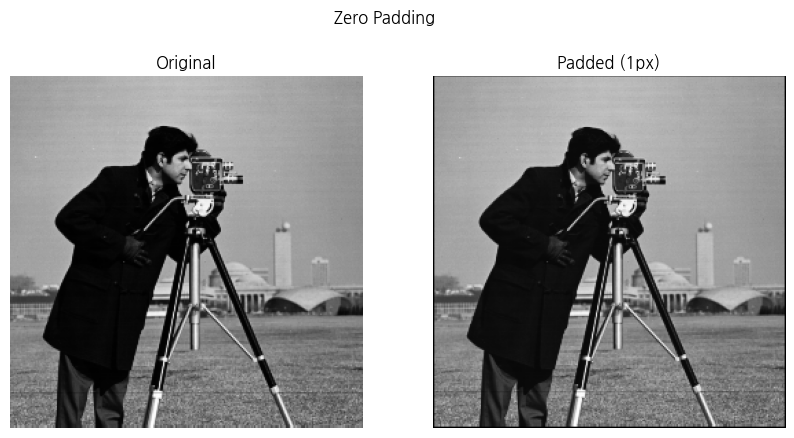

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pad_image(image_path, padding=20, display=True, title='Zero Padding'):
    # 1. 이미지 불러오기 (grayscale)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 2. 새로운 배열 (0으로 채운 뒤 중앙에 원본 배치)
    padded = np.zeros((image.shape[0] + padding*2,
                       image.shape[1] + padding*2), dtype=image.dtype)
    padded[padding:-padding, padding:-padding] = image

    if display:
        print(f'original image size: {image.shape}')
        print(f'padded image size: {padded.shape}')

        # 3. 시각화
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        plt.suptitle(title)

        axes[0].imshow(image, cmap='gray')
        axes[0].set_title('Original')
        axes[0].axis('off')

        axes[1].imshow(padded, cmap='gray')
        axes[1].set_title(f'Padded ({padding}px)')
        axes[1].axis('off')

        plt.show()

    return padded

# 실행 예시
padded_img = pad_image("cameraman.png", padding=1)


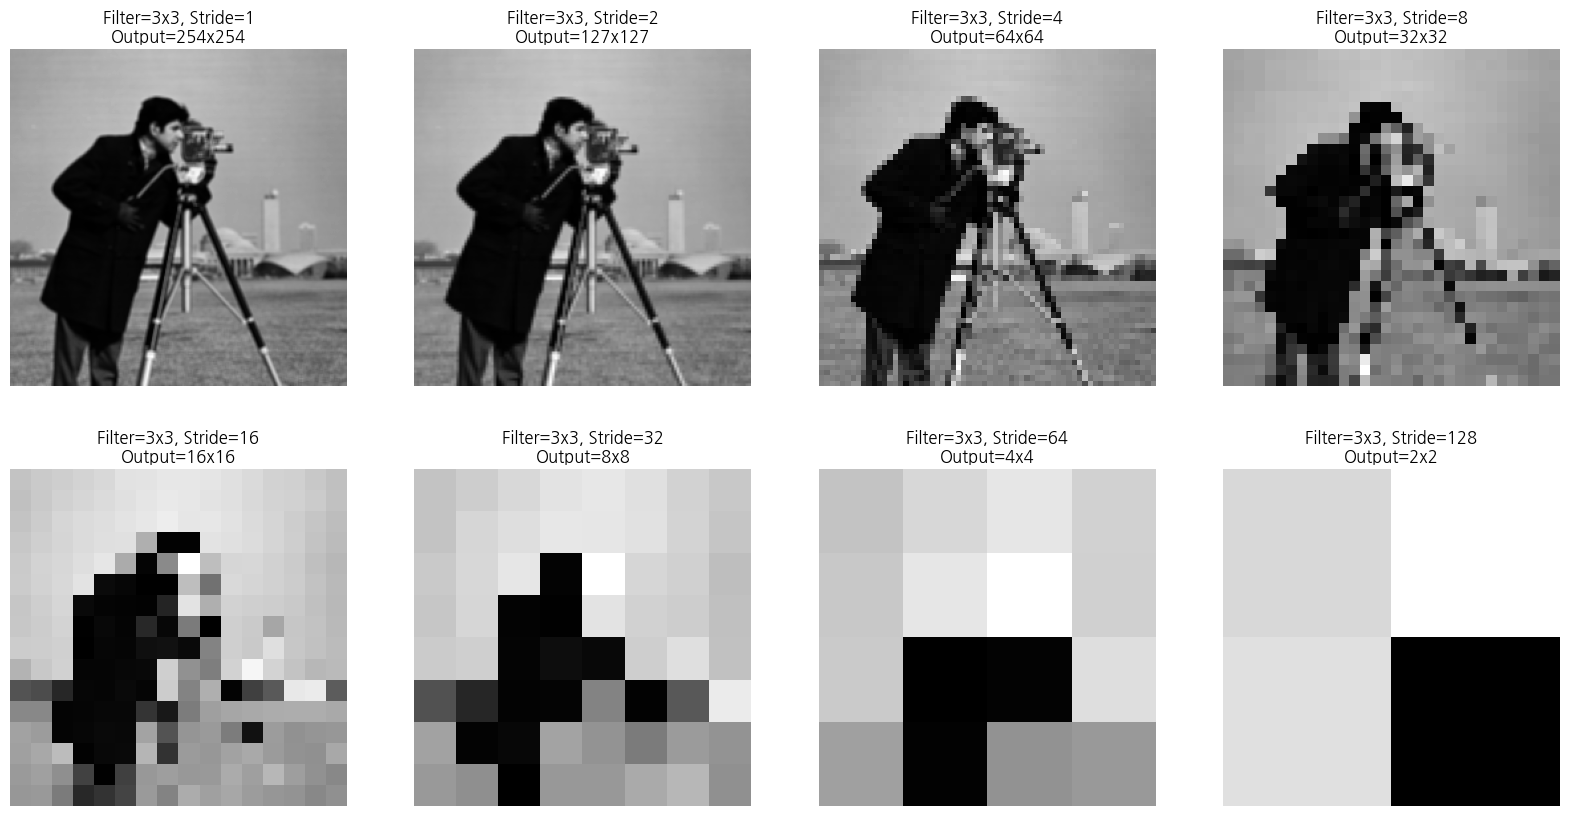

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 불러오기
image = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)

# 2. 필터 크기
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)

# 3. 합성곱 함수 (stride 적용)
def conv2d_stride(img, kernel, stride=1):
    kh, kw = kernel.shape
    ih, iw = img.shape
    oh = (ih - kh) // stride + 1
    ow = (iw - kw) // stride + 1
    
    output = np.zeros((oh, ow), dtype=np.float32)
    for i in range(0, ih - kh + 1, stride):
        for j in range(0, iw - kw + 1, stride):
            region = img[i:i+kh, j:j+kw]
            output[i//stride, j//stride] = np.sum(region * kernel)
    return output

# 4. 다양한 stride 적용
stride_list = [1, 2, 4, 8, 16, 32, 64, 128]
results = [conv2d_stride(image, kernel, stride=s) for s in stride_list]

# 5. 시각화 (2행 4열)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

ih, iw = image.shape
for ax, s, out in zip(axes.flat, stride_list, results):
    oh, ow = out.shape
    ax.imshow(out, cmap='gray')
    ax.set_title(f"Filter={kernel_size}x{kernel_size}, Stride={s}\nOutput={oh}x{ow}")
    ax.axis('off')

plt.show()


In [44]:
import torch
import torch.nn as nn

# 아래 그림 첫 번째 꺼
# 입력 채널 3개, 출력 채널 3개, 필터 크기 3x3, 스트라이드 2, 패딩 0
# 
conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=2, padding=0)

# 입력 텐서: 배치 크기 3, 채널 수 3, 높이 5, 너비 5
x = torch.randn(3, 3, 5, 5)

# 합성곱 수행
y = conv(x)

# 출력 텐서의 형태 출력
print(y.shape)  # 결과: torch.Size([3, 3, 2, 2])

torch.Size([3, 3, 2, 2])


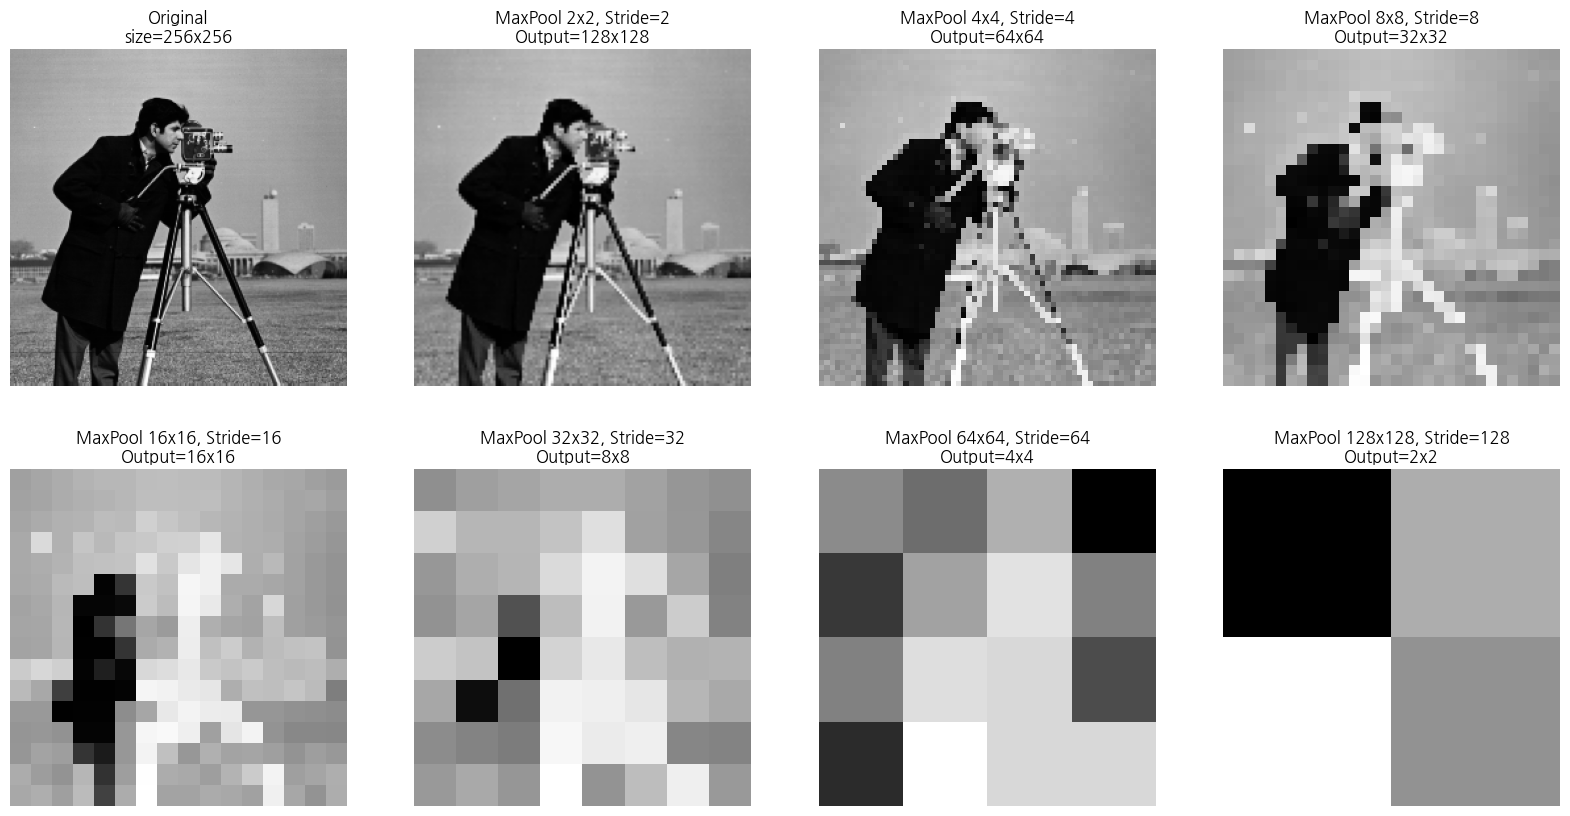

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 불러오기 (그레이스케일)
image = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)

# 2. Max Pooling 함수 정의
def max_pooling(img, pool_size=2, stride=2):
    ph, pw = pool_size, pool_size
    ih, iw = img.shape
    
    oh = (ih - ph) // stride + 1
    ow = (iw - pw) // stride + 1
    
    output = np.zeros((oh, ow), dtype=np.float32)
    for i in range(0, ih - ph + 1, stride):
        for j in range(0, iw - pw + 1, stride):
            region = img[i:i+ph, j:j+pw]
            output[i//stride, j//stride] = np.max(region)  # 최대값
    return output

# 3. pool_size와 stride를 동일하게 줌
size_list = [2, 4, 8, 16, 32, 64, 128]

# 4. 원본 + 결과 리스트
results = [image] + [max_pooling(image, pool_size=s, stride=s) for s in size_list]
titles  = ["Original"] + [f"MaxPool {s}x{s}, Stride={s}" for s in size_list]

# 5. 시각화 (2행 4열)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for ax, title, out in zip(axes.flat, titles, results):
    oh, ow = out.shape
    ax.imshow(out, cmap='gray')
    if title == "Original":
        ax.set_title(f"{title}\nsize={oh}x{ow}")
    else:
        ax.set_title(f"{title}\nOutput={oh}x{ow}")
    ax.axis('off')

plt.show()


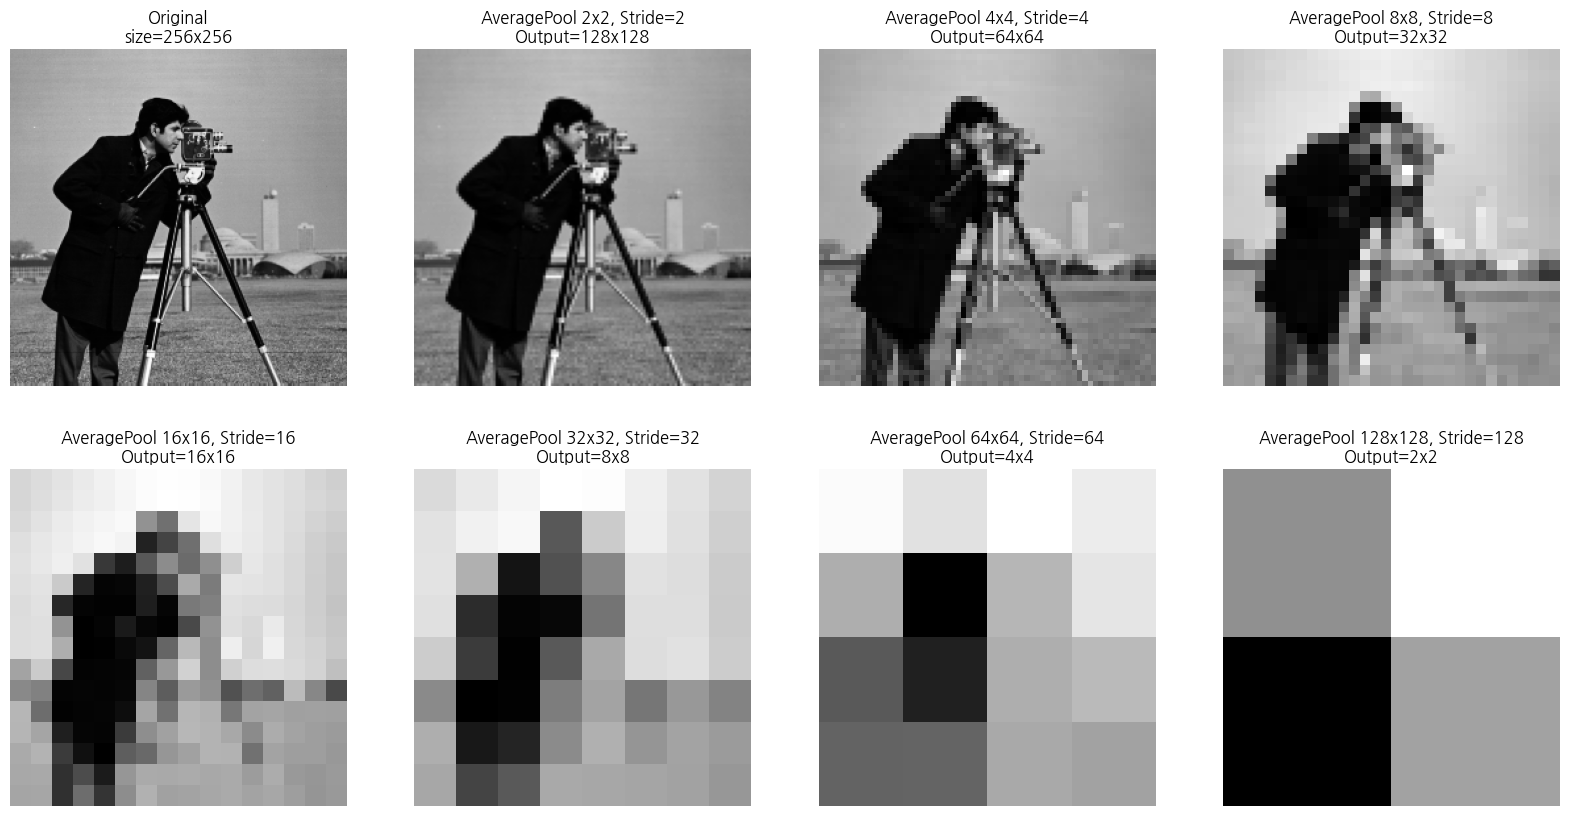

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 불러오기 (그레이스케일)
image = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)

# 2. Max Pooling 함수 정의
def max_pooling(img, pool_size=2, stride=2):
    ph, pw = pool_size, pool_size
    ih, iw = img.shape
    
    oh = (ih - ph) // stride + 1
    ow = (iw - pw) // stride + 1
    
    output = np.zeros((oh, ow), dtype=np.float32)
    for i in range(0, ih - ph + 1, stride):
        for j in range(0, iw - pw + 1, stride):
            region = img[i:i+ph, j:j+pw]
            output[i//stride, j//stride] = np.mean(region)  # mean
    return output

# 3. pool_size와 stride를 동일하게 줌
size_list = [2, 4, 8, 16, 32, 64, 128]

# 4. 원본 + 결과 리스트
results = [image] + [max_pooling(image, pool_size=s, stride=s) for s in size_list]
titles  = ["Original"] + [f"AveragePool {s}x{s}, Stride={s}" for s in size_list]

# 5. 시각화 (2행 4열)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for ax, title, out in zip(axes.flat, titles, results):
    oh, ow = out.shape
    ax.imshow(out, cmap='gray')
    if title == "Original":
        ax.set_title(f"{title}\nsize={oh}x{ow}")
    else:
        ax.set_title(f"{title}\nOutput={oh}x{ow}")
    ax.axis('off')

plt.show()


In [52]:
import torch
import torch.nn as nn

# 2x2 최대 풀링 계층 정의
pool = nn.MaxPool2d(kernel_size=2, stride=2)

# 입력 텐서: 배치 크기 4, 채널 수 8, 높이 28, 너비 28
x = torch.randn(4, 8, 28, 28)

# 풀링 적용
y = pool(x)

# 출력 텐서의 형태 확인
print(y.shape)  # 결과: torch.Size([4, 8, 14, 14])


torch.Size([4, 8, 14, 14])
